In [1222]:
import pandas as pd
import seaborn as sms
from sklearn import preprocessing, linear_model
import matplotlib.pyplot as plt
import plotly.express as px

In [1223]:
df = pd.read_csv("train.csv")
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [1224]:
testdf = pd.read_csv("test.csv")
testdf.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [1225]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* Drop ID columns 

In [1226]:
df.drop(columns = 'Id', axis = 1, inplace = True)
testdf.drop(columns = 'Id', axis = 1, inplace = True)

* Change these feature from numberical to categorical because these are discrete value

In [1227]:
numbericalToCat = ['MSSubClass', 'OverallQual', 'OverallCond']
for feature in numbericalToCat:
    df[feature] = df[feature].astype('object')

* Drop feature that have missing value bigger than 50%

In [1228]:
for feature in df:
    if df[feature].isnull().sum()/len(df) > 0.5:
        df.drop(columns = feature, axis = 1, inplace = True)
        testdf.drop(columns = feature, axis = 1, inplace = True)

* Separate features into 2 type: Categorical, Numberical

In [1229]:
Cat = []
Num = []
for feature in df[df.columns[:-1]]:
    if df[feature].dtype.name == 'object':
        Cat.append(feature)
    else:
        Num.append(feature)

salePrice = df['SalePrice']

print("Num: ", Num)
print("Cat: ", Cat)


Num:  ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Cat:  ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedD

* Numberical features heatmap displays relations between each pair of features

<Axes: >

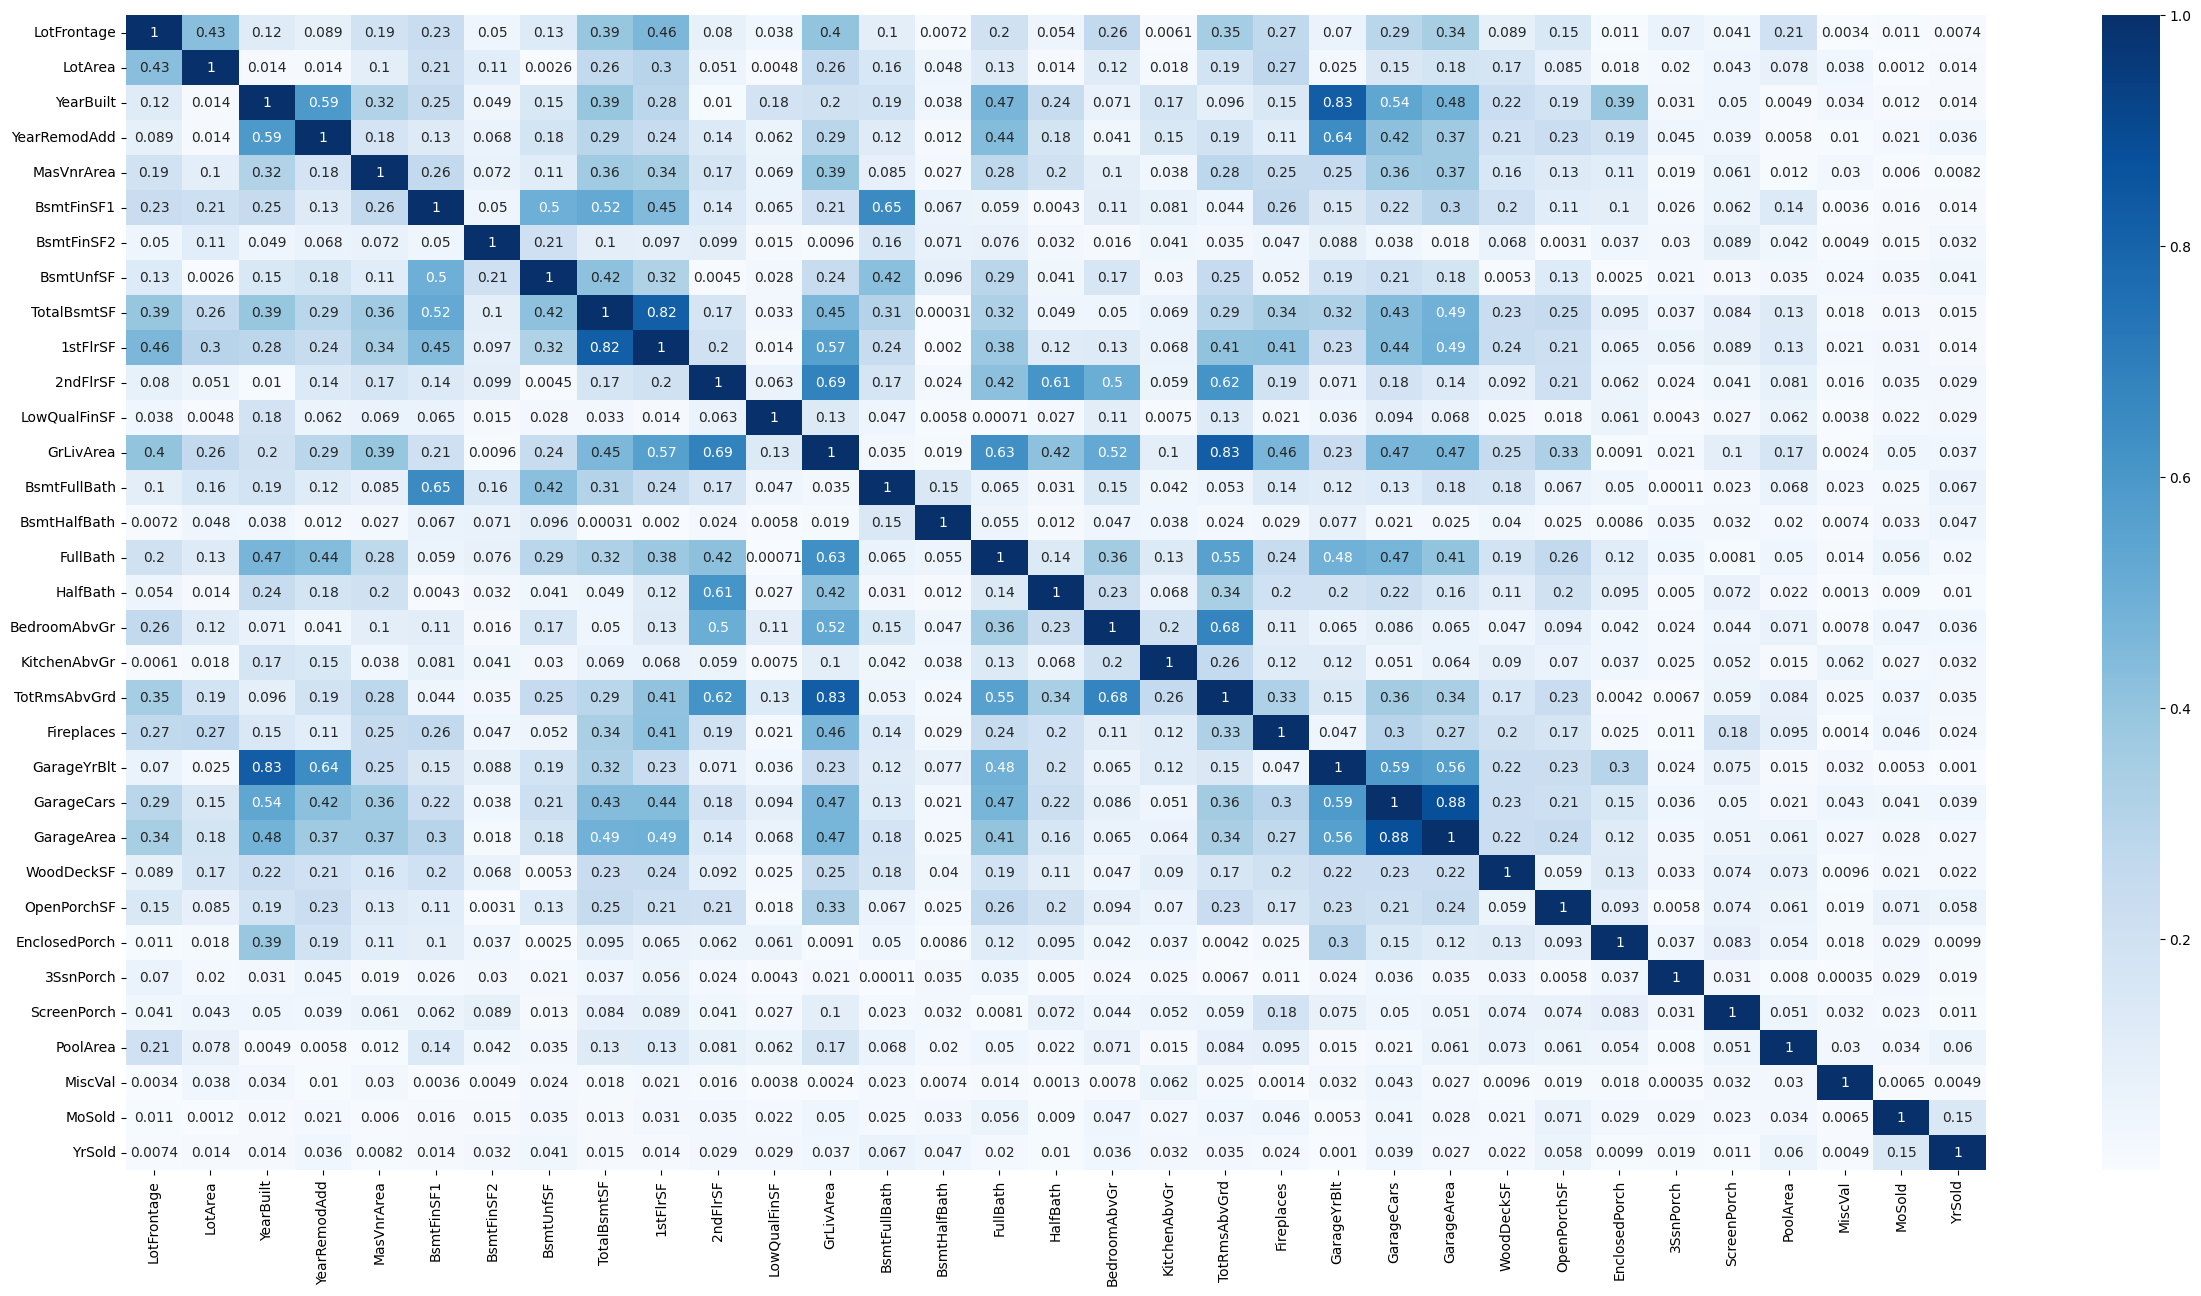

In [1230]:
plt.figure(figsize = (30,15))
corr_df = df[df.columns[:-1]].corr(numeric_only=True).abs()
sms.heatmap(corr_df, annot = True, cmap = 'Blues')

* Features that have over 0.6 correlation coefficient are removed

In [1231]:
drop = []
average_corr = corr_df.mean(axis = 1)
for row in range(len(corr_df)):
    for col in range(row + 1, len(corr_df)):
        if corr_df.iloc[row, col] > 0.6:
            if average_corr[col] > average_corr[row]:
                drop.append(col)
            else:
                drop.append(row)

highcorr = list(corr_df.columns[[item for item in set(drop)]])
print(highcorr)

['YearBuilt', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars']


* Show the correlation coefficient between SalePrice and each feature we plan to drop

In [1232]:
for each in highcorr:
    print(each,':', df[[each, 'SalePrice']].corr().abs().iloc[0,1])

YearBuilt : 0.5228973328794967
BsmtFinSF1 : 0.3864198062421535
1stFlrSF : 0.6058521846919153
2ndFlrSF : 0.31933380283206736
GrLivArea : 0.7086244776126515
TotRmsAbvGrd : 0.5337231555820284
GarageYrBlt : 0.4863616774878596
GarageCars : 0.6404091972583519


* As we can see some feature have high corr, if we drop those, it will affect the output so that we will keep the feature that > 0.6 

In [1233]:
# Corr: 0.6058521846919153
Num.remove('1stFlrSF')
highcorr.remove('1stFlrSF')

# Corr: 0.7086244776126515
Num.remove('GrLivArea')
highcorr.remove('GrLivArea')

# Corr: 0.6404091972583519
Num.remove('GarageCars')
highcorr.remove('GarageCars')

* Drop the rest of the features

In [1234]:
df.drop(columns = highcorr, axis = 1, inplace = True)
testdf.drop(columns = highcorr, axis = 1, inplace = True)
for item in highcorr:
    Num.remove(item)

### Deal With Missing Value

In [1235]:
# Take input of feature name and no of missing value as a list
listNoOfNull = list(df.isnull().sum())
nameAndNoOfNull = []
for i in range(len(df.columns)):
    # If the feature has missing value, add to list
    if listNoOfNull[i] > 0:
        # name, no of null, feature's type
        nameAndNoOfNull.append([df.columns[i], listNoOfNull[i], df[df.columns[i]].dtype.name])

# convert it into dataframe
missingVal = pd.DataFrame(data = nameAndNoOfNull, columns = ['Name', 'MissingValues', 'dtype'])

* Bar graph displays Missing Value(train data)

In [1236]:
fig = px.bar(data_frame = missingVal.sort_values(by = 'MissingValues'), x = 'MissingValues', y = 'Name', color = 'dtype', text = 'MissingValues', height = 600, width = 1000, title = 'Missing Value in train data')
fig.update_traces(textposition = 'outside')
fig.show()

* Separate num feature and cat feature 

In [1237]:
numbericalFeature = []
categoricalFeature = []
for i in range(len(missingVal)):
    if missingVal.iloc[i].get('dtype') == 'float64':
        numbericalFeature.append(missingVal.iloc[i].get('Name'))
    else:
        categoricalFeature.append(missingVal.iloc[i].get('Name'))

print(numbericalFeature)
print(categoricalFeature)

['LotFrontage', 'MasVnrArea']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [1238]:
df[numbericalFeature].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0


* Because There are the huge differences between the median and the mean of MasVNArea, So I will fill the missing value with median because the mean might be affected by the outliers

In [1239]:
for each in numbericalFeature:
    df[each].fillna(df[each].median(), inplace = True)

for each in numbericalFeature:
    testdf[each].fillna(testdf[each].median(), inplace = True)

In [1240]:
# Check null
df[numbericalFeature].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [1241]:
# Check null
df[categoricalFeature].isnull().sum()

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [1242]:
for each in categoricalFeature:
    print(df[each].unique())


['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [1243]:
# Gather all feature that relevant to basement
bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[df['BsmtQual'].isnull()][bsmt]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


* Some house don't have basement so we create a new type name NotAvailable and replace the na for house has no basement

In [1244]:
df[bsmt] = df[bsmt].fillna("NotAvailable")
testdf[bsmt] = testdf[bsmt].fillna("NotAvailable")

In [1245]:
# Check null
df[bsmt].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [1246]:
# Update list
categoricalFeature = [x for x in categoricalFeature if x not in bsmt]
print(categoricalFeature)

['Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [1247]:
# Gather all feature that relevant to garage
garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[df['GarageType'].isnull()][garage]

,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
...,...,...,...,...
1349,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN


* Some house don't have garage so we create a new type name NotAvailable and replace the na for house has no basement

In [1248]:
df[garage] = df[garage].fillna("NotAvailable")
testdf[garage] = testdf[garage].fillna("NotAvailable")

In [1249]:
df[garage].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [1250]:
# Update list
categoricalFeature = [x for x in categoricalFeature if x not in garage]
print(categoricalFeature)

['Electrical', 'FireplaceQu']


In [1251]:
# Gather all feature that relevant to fireplace
fireplace = ['Fireplaces', 'FireplaceQu']
df[df['FireplaceQu'].isnull()][fireplace]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


* Some house don't have fireplace so we create a new type name NotAvailable and replace the na for house has no basement

In [1252]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NotAvailable")
testdf['FireplaceQu'] = testdf['FireplaceQu'].fillna("NotAvailable")

In [1253]:
# Check null
df['FireplaceQu'].isnull().sum()

0

In [1254]:
# Update list
categoricalFeature = [x for x in categoricalFeature if x not in fireplace]
print(categoricalFeature)

['Electrical']


In [1255]:
# Check null
df['Electrical'].isnull().sum()

1

In [1256]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

* mean and median are not have a huge difference and the number of missing value is small, 1, so I will replace with mode

In [1257]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [1258]:
# Check sum of null of all feature in train data set
df.isnull().sum().sum()

0

In [1259]:
# Check sum of null of all feature in test data set
testdf.isnull().sum().sum()

21

* Deal with test data the same as we deal with train data

In [1260]:
listNoOfNullTest = list(testdf.isnull().sum())
nameAndNoOfNullTest = []
for i in range(len(testdf.columns)):
    if listNoOfNullTest[i] > 0:
        nameAndNoOfNullTest.append([testdf.columns[i], listNoOfNullTest[i], testdf[testdf.columns[i]].dtype.name])

missingValTest = pd.DataFrame(data = nameAndNoOfNullTest, columns = ['Name', 'MissingValues', 'dtype'])

In [1261]:
figTest = px.bar(data_frame = missingValTest.sort_values(by = 'MissingValues'), x = 'MissingValues', y = 'Name', color = 'dtype', text = 'MissingValues', height = 500, width = 800, title = 'Missing Value in train data')
figTest.update_traces(textposition = 'outside')
figTest.show()

* Separate Num and Cat

In [1262]:
numbericalFeatureTest = []
categoricalFeatureTest = []
for i in range(len(missingValTest)):
    if missingValTest.iloc[i].get('dtype') == 'float64':
        numbericalFeatureTest.append(missingValTest.iloc[i].get('Name'))
    else:
        categoricalFeatureTest.append(missingValTest.iloc[i].get('Name'))

print(numbericalFeatureTest)
print(categoricalFeatureTest)

['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


* Deal with numberical feature in test data

In [1263]:
testdf[numbericalFeatureTest].describe().T

,count,mean,std,min,25%,50%,75%,max
BsmtFinSF2,1458.0,52.619342,176.753926,0.0,0.00,0.0,0.00,1526.0
BsmtUnfSF,1458.0,554.294925,437.260486,0.0,219.25,460.0,797.75,2140.0
TotalBsmtSF,1458.0,1046.117970,442.898624,0.0,784.00,988.0,1305.00,5095.0
BsmtFullBath,1457.0,0.434454,0.530648,0.0,0.00,0.0,1.00,3.0
BsmtHalfBath,1457.0,0.065202,0.252468,0.0,0.00,0.0,0.00,2.0
GarageCars,1458.0,1.766118,0.775945,0.0,1.00,2.0,2.00,5.0
GarageArea,1458.0,472.768861,217.048611,0.0,318.00,480.0,576.00,1488.0


* Because mean and median have a hugh difference so I will replace null with median so it will not be affected by the outliers

In [1264]:
for each in numbericalFeatureTest:
    testdf[each] = testdf[each].fillna(testdf[each].median())

* For cat feature, I replace null value with mode.

In [1265]:
for each in categoricalFeatureTest:
    testdf[each] = testdf[each].fillna(testdf[each].mode()[0])

In [1266]:
# Check null value in both data set
print("missing value in df: ", df.isnull().sum().sum())
print("missing value in testdf: ", testdf.isnull().sum().sum())

missing value in df:  0
missing value in testdf:  0


In [1267]:
# Create a list of cat feature
categorical = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)

# Label encoding (Convert cat feature into number so that we can use it to train model)
label_encoder = preprocessing.LabelEncoder()
for col in categorical:
    # Train data
    df[col] = label_encoder.fit_transform(df[col])
    # Test data
    testdf[col] = label_encoder.fit_transform(testdf[col])

In [1268]:
from sklearn.preprocessing import StandardScaler
# Standard Scaler (Scale data so that it become normal distribution (mean = 0, variance = 1)) help to visualize

# Train data
x = df[df.columns[:-1]]
y = df['SalePrice']
x = StandardScaler().fit_transform(x)

# Test data
x_test = testdf
x_test = StandardScaler().fit_transform(x_test)

In [1269]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

# Y predict from train model
y_predict = lr.predict(x_test)

print(len(x), len(y), len(x_test), len(y_predict))


1460 1460 1459 1459


In [1270]:
# Apply PCA - reduce the dimension so that it help easier to visualize the data
from sklearn.decomposition import PCA

# reduce to 1 component
pca = PCA(n_components = 1)

principalComponents = pca.fit_transform(x_test)

Text(0, 0.5, 'SalePrice')

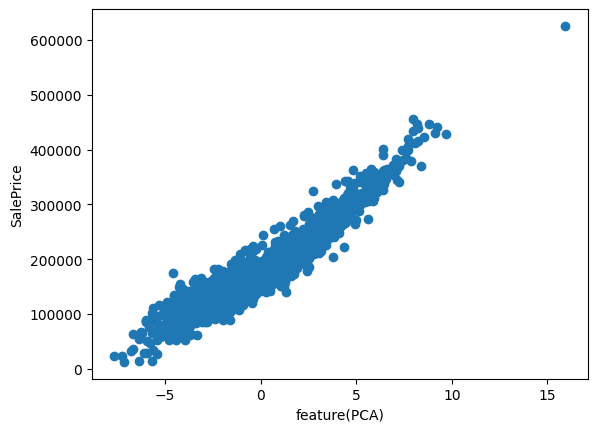

In [1271]:
# Draw graph with x_test(pca) and y_predict
plt.scatter(principalComponents, y_predict)
plt.xlabel('feature(PCA)')
plt.ylabel('SalePrice')

In [1272]:
# from pathlib import Path  

# test = pd.read_csv("sample_submission.csv")
# data = {'Id': test['Id'], 'SalePrice': y_predict}

# output = pd.DataFrame(data = data)

# filepath = Path('out1.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
 
# output.to_csv(filepath, index = False) 